In [2]:
import re
import pandas as pd 
pd.set_option('display.max_columns', None) 
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

## Working directory

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

## Load data

### Load the raw files

In [4]:
# Define a function for reading prolog files
def read_prolog_file(filename):
    with open(filename, 'r') as f:
        content = f.readlines()
    return content

In [5]:
# read the no_payment_due.pl and extract StudentID and NoPaymentDue
content1 = read_prolog_file(filename='datasets\\no_payment_due.pl')

facts = []
for line in content1:
    match = re.match(r'no_payment_due\(student(\d+),(.+)\)\.', line.strip())
    if match:
        studentid, status = match.groups()
        facts.append([studentid, status])
        
df1 = pd.DataFrame(facts, columns=['StudentID', 'NoPaymentDue'])
display(df1.head(), df1.shape)

,StudentID,NoPaymentDue
0,1000,pos
1,999,pos
2,998,pos
3,996,pos
4,994,pos


(1000, 2)

In [6]:
# change the datatype of StudentID to int
df1['StudentID'] = df1['StudentID'].astype(int)

In [7]:
# Enlisted file for Enlisted and Service
content2 = read_prolog_file(filename='datasets\\enlist.pl')

facts = []
for line in content2:
    match = re.match(r'enlist\(student(\d+),(.+)\)\.', line.strip())
    if match:
        studentid, service = match.groups()
        facts.append([studentid, service])

df2 = pd.DataFrame(facts, columns=['StudentID', 'Service'])
display(df2.head(), df2.shape)

,StudentID,Service
0,40,fire_department
1,51,fire_department
2,109,fire_department
3,139,fire_department
4,148,fire_department


(306, 2)

In [8]:
# change the datatype of StudentID to int
df2['StudentID'] = df2['StudentID'].astype(int)

In [9]:
# read Disabled file for Disabled
content3 = read_prolog_file(filename='datasets\\disabled.pl')

facts = []
for line in content3:
    match = re.match(r'disabled\(student(\d+)\)\.', line.strip())
    if match:
        studentid = match.groups()
        facts.append([studentid[0], 'Disabled'])

df3 = pd.DataFrame(facts, columns=['StudentID', 'Disabled'])
display(df3.head(), df3.shape)

,StudentID,Disabled
0,992,Disabled
1,976,Disabled
2,963,Disabled
3,918,Disabled
4,913,Disabled


(95, 2)

In [10]:
# change the datatype of StudentID to int
df3['StudentID'] = df3['StudentID'].astype(int)

In [11]:
# read Unemployed file for Unemployed
content4 = read_prolog_file(filename='datasets\\unemployed.pl')

facts = []
for line in content4:
    match = re.match(r'unemployed\(student(\d+)\)\.', line.strip())
    if match:
        studentid = match.groups()
        facts.append([studentid[0], 'Unemployed'])

df4 = pd.DataFrame(facts, columns=['StudentID', 'Unemployed'])
display(df4.head(), df4.shape)

,StudentID,Unemployed
0,1000,Unemployed
1,996,Unemployed
2,993,Unemployed
3,948,Unemployed
4,946,Unemployed


(98, 2)

In [12]:
# change the datatype of StudentID to int
df4['StudentID'] = df4['StudentID'].astype(int)

In [13]:
# read Enrolled file for Enrolled and School
content5 = read_prolog_file(filename = 'datasets\\enrolled.pl')

facts = []
for line in content5:
    match = re.match(r'enrolled\(student(\d+),(.+),(.+)\)\.', line.strip())
    if match:
        studentid, school, units = match.groups()
        facts.append([studentid, school, units])

df5 = pd.DataFrame(facts, columns=['StudentID', 'School', 'Units'])
display(df5.head(), df5.shape)

,StudentID,School,Units
0,10,ucb,2
1,18,ucsd,4
2,20,ucsd,3
3,35,ucsd,4
4,44,ucsd,1


(1194, 3)

In [14]:
# change the data type of Units from object to int
df5['Units'] = df5['Units'].astype(int)

# change the datatype of StudentID to int
df5['StudentID'] = df5['StudentID'].astype(int)

### describe the data

In [15]:
# Create a metadata dataframe that contains information about the input dataframe
def metadata(df):
    columns_list = list(df.columns.values)
    metadata = pd.DataFrame(columns_list, columns=['col_name'])

    # Data types
    metadata['data_type'] = [i for i in df.dtypes.astype(str)]

    # Missing values
    metadata['missing_values'] = [i for i in df.isnull().sum()]

    # Missing values percentage in two digits number
    metadata['missing_values_percentage'] = [round(i*100,2) for i in df.isnull().sum() / df.shape[0]]
    
    # Number of unique values
    metadata['unique_values'] = [i for i in df.nunique()]

    # Number of unique values percentage
    metadata['unique_values_percentage'] = [round(i*100,2) for i in df.nunique() / df.shape[0]]

    # Basic statistics for interval columns
    interval_columns = [col for col in columns_list if df[col].dtype != 'object']
    desc_interval = df[interval_columns].agg(['min', 'max', 'std']).transpose().reset_index().rename(columns={'index': 'col_name'})
    metadata = metadata.merge(desc_interval, on='col_name', how='left')

    return metadata

In [16]:
# Describe df1 df2 df3 df4 df5 by usng metadata function
display(metadata(df1), metadata(df2), metadata(df3), metadata(df4), metadata(df5))


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,1000,100.0,1.0,1000.0,288.819436
1,NoPaymentDue,object,0,0.0,2,0.2,NaN,NaN,NaN


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,283,92.48,4.0,1000.0,283.174744
1,Service,object,0,0.0,7,2.29,NaN,NaN,NaN


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,95,100.00,26.0,992.0,272.247197
1,Disabled,object,0,0.0,1,1.05,NaN,NaN,NaN


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,98,100.00,9.0,1000.0,275.329406
1,Unemployed,object,0,0.0,1,1.02,NaN,NaN,NaN


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,960,80.40,1.0,1000.0,291.379457
1,School,object,0,0.0,6,0.50,NaN,NaN,NaN
2,Units,int32,0,0.0,15,1.26,1.0,15.0,3.750224


1. Since the unique values percentages in df2 and df5 are not 100%, which means there may be some one-to-many relationships in the data, we need to aggregate data. 
2. For those dataframe with less than 1000 unique values, we need to use left join to merge them with the dataframe with 1000 unique values. And then mark the missing values as 0 or something else.

### data exploration

In [17]:
# Perform exploratory data analysis on a specified column in a DataFrame, displaying basic statistics and visualizations.
def data_exploration(df, column):
    col_type = df[column].dtype

    if col_type == 'object' or col_type == 'category': 
        unique_values = df[column].nunique()
        print(f"Counts and percentages of unique values in {column}:\n")
        count_pct = pd.concat([df[column].value_counts(), df[column].value_counts(normalize=True) * 100], axis=1)
        count_pct.columns = ['Count', 'Percentage']
        print(count_pct)
        if unique_values < 10:   
            plt.figure(figsize=(8, 6))
            sns.countplot(data=df, x=column)
            plt.title(f"Bar plot of {column}") # Bar plot
            plt.show()
        else:
            bins_num = df[column].nunique()
            sns.histplot(data=df, x=column, bins=bins_num, kde=True) # Histogram
            plt.title(f"Histogram of {column}")
            plt.xticks(rotation=90, fontsize=7, ha="center")
            plt.show()
    
    else:
        mean = df[column].mean() # mean
        std_dev = df[column].std() # standard deviation
        # Calculate interquartile range (IQR)
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1 # interquartile range
        outlier_range = (q1 - 1.5*iqr, q3 + 1.5*iqr) # outlier range
        outliers = df[(df[column] < outlier_range[0]) | (df[column] > outlier_range[1])]
        outliers = outliers[column].values # outlier values

        print(f"Mean of {column}: {mean:.2f}")
        print(f"Standard deviation of {column}: {std_dev:.2f}")
        print(f"Number of outliers in {column}: {len(outliers)}")
        print("Outliers values:")
        print(outliers)

        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, x=column)
        plt.title(f"Box plot of {column}") # Box plot
        plt.show()

        if df[column].nunique() >= 10:
            plt.figure(figsize=(8, 6))
            sns.histplot(data=df, x=column, bins=10, kde=True) # Histogram that has 10 bins
            plt.title(f"Histogram of {column}")
            plt.show()
        else:
            plt.figure(figsize=(8, 6))
            sns.histplot(data=df, x=column, kde=True) # Histogram
            plt.title(f"Histogram of {column}")
            plt.show()

Counts and percentages of unique values in NoPaymentDue:

     Count  Percentage
pos    643        64.3
neg    357        35.7


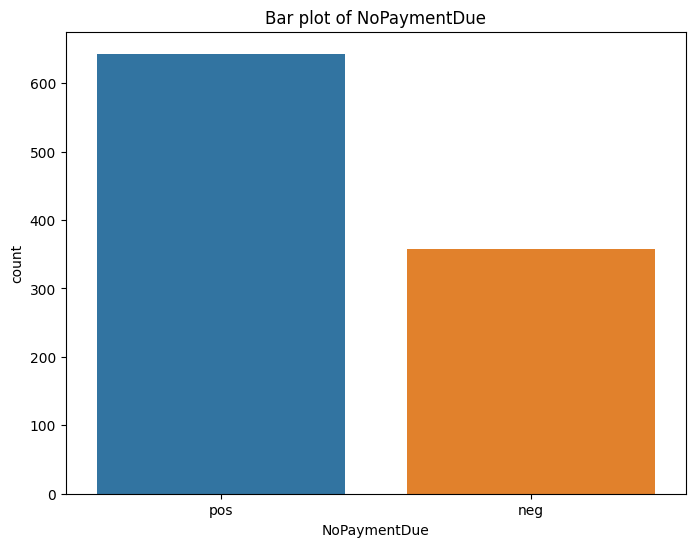

In [19]:
# Perform data exploration on df1 df2 df3 df4 df5
data_exploration(df1, 'NoPaymentDue') # Positive class is the majority class

Counts and percentages of unique values in Service:

                 Count  Percentage
fire_department    114   37.254902
navy                37   12.091503
army                35   11.437908
peace_corps         32   10.457516
marines             31   10.130719
foreign_legion      31   10.130719
air_force           26    8.496732


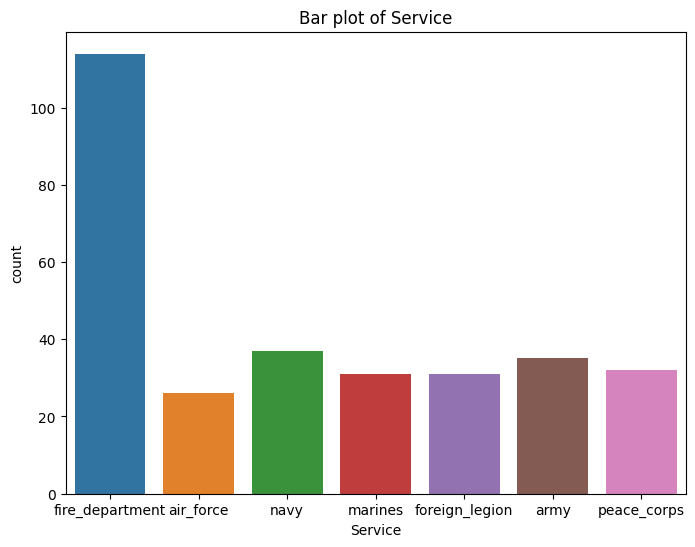

In [20]:
data_exploration(df2, 'Service') # fire_department is the majority class

Counts and percentages of unique values in School:

      Count  Percentage
occ     247   20.686767
ucla    236   19.765494
uci     230   19.262982
smc     226   18.927973
ucsd    166   13.902848
ucb      89    7.453936


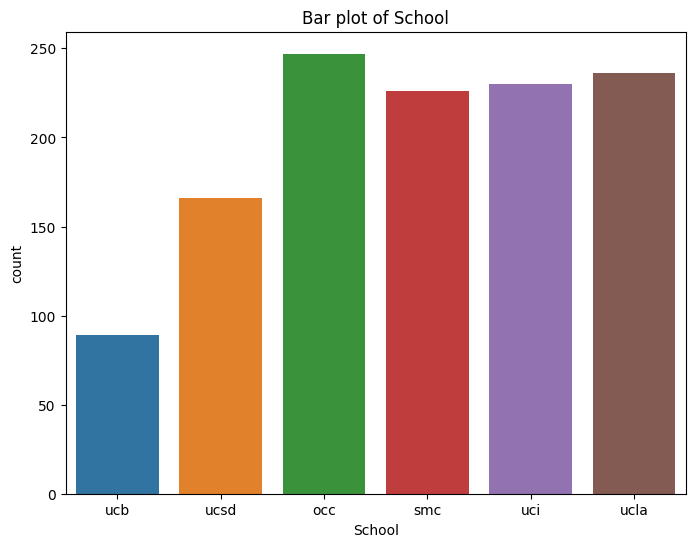

In [23]:
data_exploration(df5, 'School') 

Mean of Units: 6.39
Standard deviation of Units: 3.75
Number of outliers in Units: 0
Outliers values:
[]


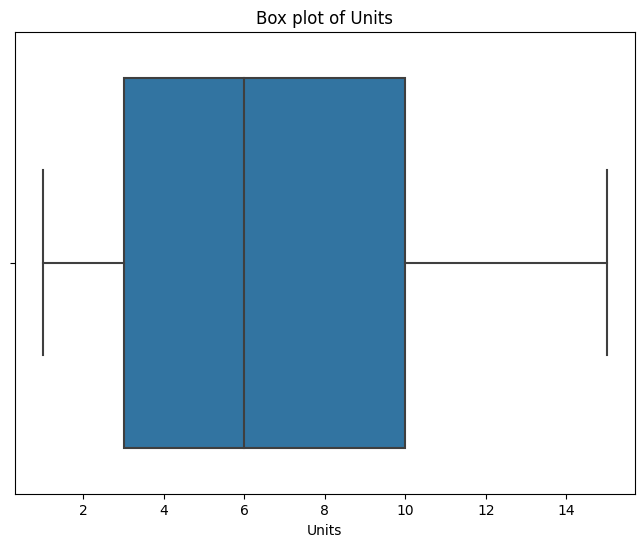

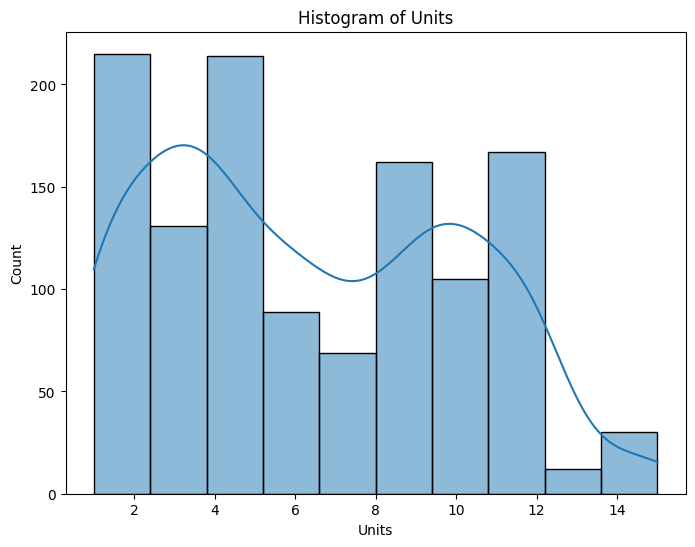

In [25]:
data_exploration(df5, 'Units') # There are outliers in Units